In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 41.9 MB/s 
     |████████████████████████████████| 6.3 MB 42.7 MB/s 


In [ ]:
pip install contextily

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
%matplotlib inline

import pandas as pd
import geopandas 
import contextily 
import xyzservices.providers as xyz
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from shapely.geometry import LineString

In [ ]:
from shapely.geometry import Point

#Per importare i file

#1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
Italy = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/Reg01012021_g")
Italy

COD_RIP  ...                                           geometry
0         1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
1         1  ...  POLYGON ((390652.644 5091766.171, 390748.643 5...
2         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
3         2  ...  POLYGON ((743267.749 5219765.793, 743387.812 5...
4         2  ...  POLYGON ((768123.960 5175397.497, 768135.210 5...
5         2  ...  MULTIPOLYGON (((872344.457 5061894.048, 872344...
6         1  ...  MULTIPOLYGON (((568226.691 4874823.573, 568219...
7         2  ...  MULTIPOLYGON (((618343.929 4893985.661, 618335...
8         3  ...  MULTIPOLYGON (((674426.642 4680710.364, 674563...
9         3  ...  MULTIPOLYGON (((776982.140 4832209.918, 776910...
10        3  ...  POLYGON ((802303.985 4874996.456, 802366.734 4...
11        3  ...  MULTIPOLYGON (((875952.995 4524692.050, 875769...
12        4  ...  MULTIPOLYGON (((930273.425 4714737.743, 930147...
13        4  ...  POLYGON ((984002.800 4670714.415, 985067.040 4...
14        4  ...  MULTIPOLYGON (((1037313.692 4449410.367, 10373...
15        4  ...  MULTIPOLYGON (((1280636.111 4454459.746, 12806...
16        4  ...  MULTIPOLYGON (((1073707.061 4445700.106, 10737...
17        4  ...  MULTIPOLYGON (((1083358.846 4416348.741, 10833...
18        5  ...  MULTIPOLYGON (((822886.611 3935355.889, 822871...
19        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[20 rows x 6 columns]

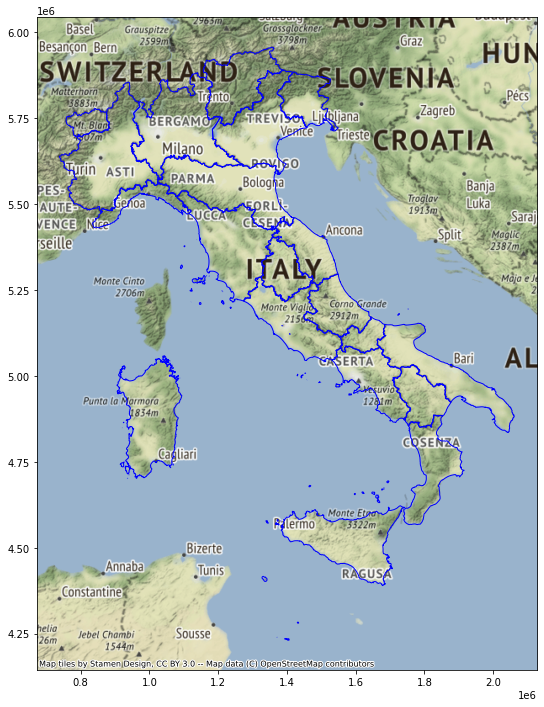

In [ ]:
ax = Italy.to_crs(epsg=3857).plot(figsize=(18,12), facecolor= "none", edgecolor = "blue")
contextily.add_basemap(ax)

#2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

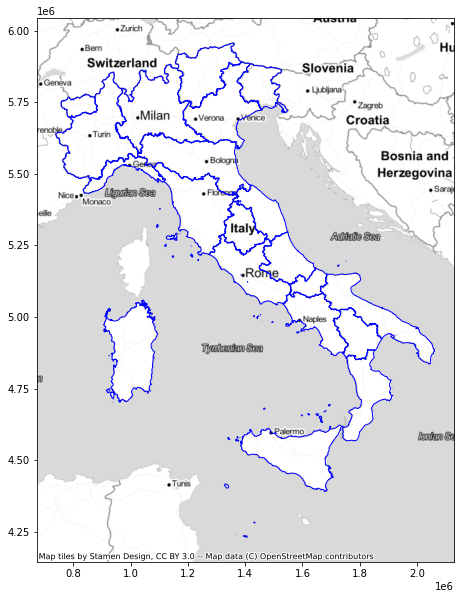

In [ ]:
ax = Italy.to_crs(epsg=3857).plot(figsize=(12,10), facecolor= "none", edgecolor = "b")
contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite)

#3. visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
Provincie_Lombardia = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/ProvCM01012021_g")
Provincie_Lombardia

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [ ]:
Lombardia = Italy.loc[Italy['DEN_REG'] == 'Lombardia', 'geometry'].squeeze()
GEO_Lombardia = Provincie_Lombardia[Provincie_Lombardia.within(Lombardia)]
GEO_Lombardia 

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((483071.566 5104606.092, 483258.471 5...
12         1  ...  MULTIPOLYGON (((498077.207 5089780.202, 497614...
13         1  ...  POLYGON ((595652.358 5163515.659, 596042.420 5...
14         1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
15         1  ...  POLYGON ((585288.233 5104483.085, 585414.669 5...
16         1  ...  POLYGON ((615296.024 5132340.876, 615374.024 5...
17         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
18         1  ...  POLYGON ((542189.537 5037362.585, 542408.347 5...
19         1  ...  POLYGON ((630538.958 5031669.589, 632819.864 5...
96         1  ...  POLYGON ((532079.618 5104664.092, 533286.608 5...
97         1  ...  POLYGON ((534551.968 5035118.603, 534818.280 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...

[12 rows x 13 columns]

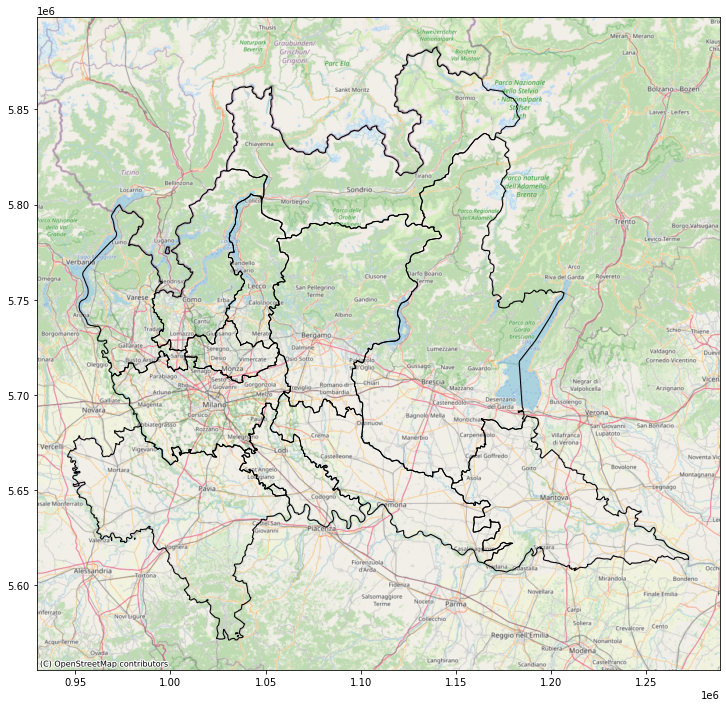

In [ ]:
ax = GEO_Lombardia.to_crs(epsg=3857).plot(figsize=(18,12), facecolor="none", edgecolor="black")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

#4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

Visualizzo i comuni

Per stampare una mappa con colorato

In [ ]:
Comuni_Lombardia = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/Com01012021_g")
Comuni_Lombardia

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

In [ ]:
Milano = Provincie_Lombardia.loc[Provincie_Lombardia['DEN_CM'] == 'Milano', 'geometry']
Milano

14    MULTIPOLYGON (((538136.289 5004372.814, 539162...
Name: geometry, dtype: geometry

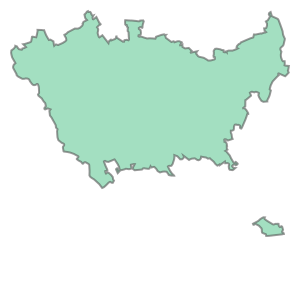

In [ ]:
Milano = Provincie_Lombardia.loc[Provincie_Lombardia['DEN_CM'] == 'Milano', 'geometry'].squeeze()
Milano

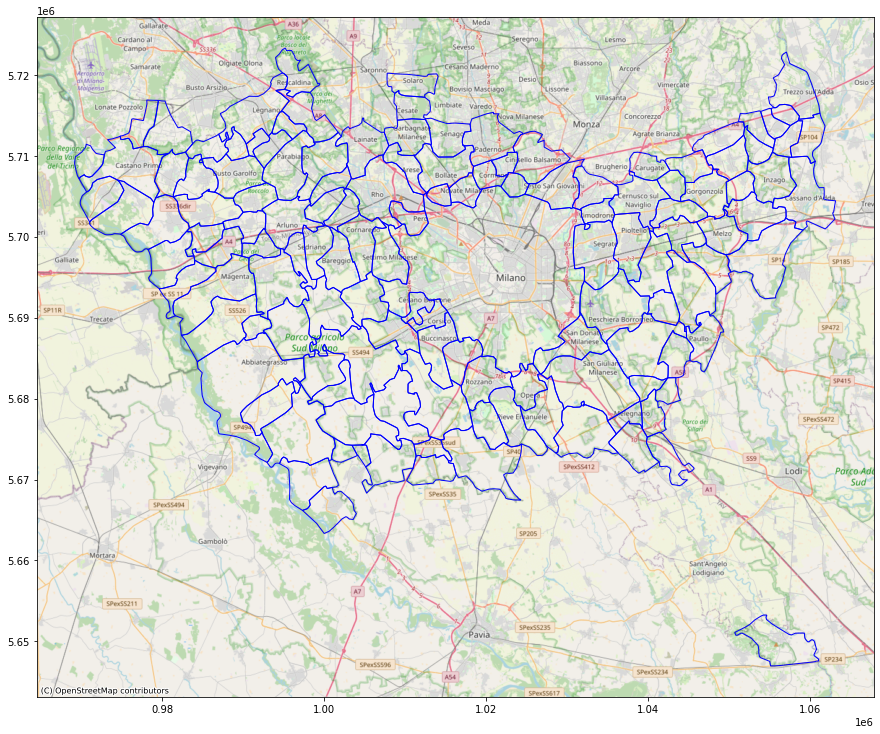

In [ ]:
Comuni_Milano = Comuni_Lombardia[Comuni_Lombardia.within(Milano)]
ax = Comuni_Milano.to_crs(epsg= 3857).plot(figsize= (15,15), facecolor = "none", edgecolor = "b")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

#5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Distretti/ds964_nil_wm.zip")
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

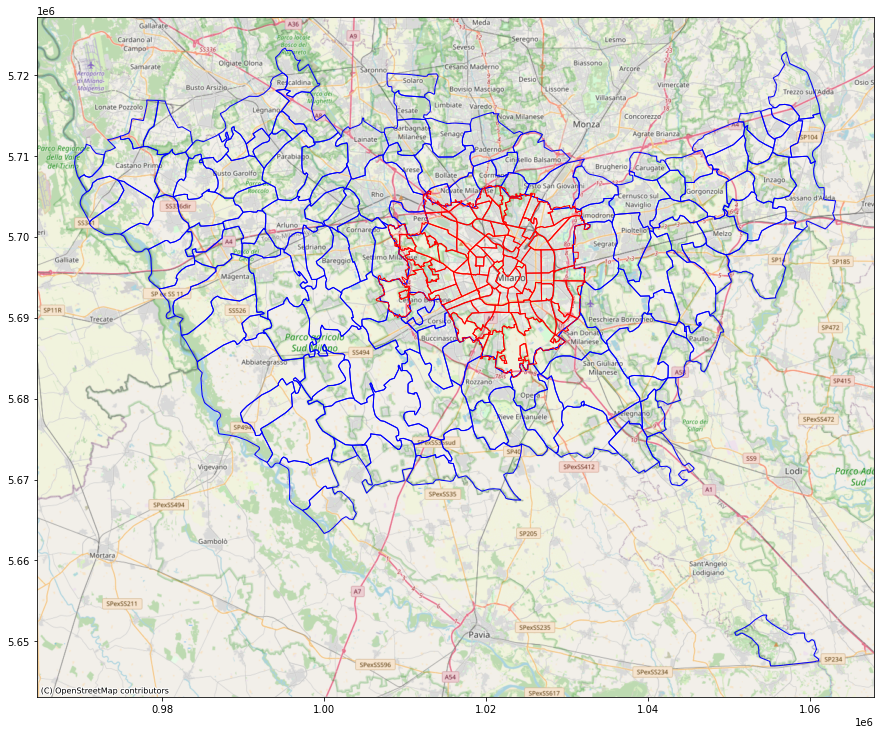

In [ ]:
ax = Comuni_Milano.to_crs(epsg= 3857).plot(figsize= (15,15), facecolor = "none", edgecolor = "b")
quartieri.to_crs(epsg= 3857).plot(ax=ax, facecolor = "none", edgecolor= "red")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

#6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

In [ ]:
Input_Utente = input("Inserisci una provincia della lombardia: ")
controllo = Provincie_Lombardia[Provincie_Lombardia["DEN_UTS"] == Input_Utente].geometry.squeeze()

if controllo.within(Milano) == True: 
  ax = Provincie_Lombardia[Provincie_Lombardia.touches(controllo) & Provincie_Lombardia.within(controllo)].to_crs(epsg=3857).plot(figsize=(12,10), alpha = 0.3 , edgecolor = "red")
  contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)
else:
  print("La provincia non si trova all'interno della Regione Lombardia")

Inserisci una provincia della lombardia: Lodi
La provincia non si trova all'interno della Regione Lombardia
